In [1]:
import pandas as pd
import numpy as np

# Load training features
train_data = pd.read_csv("final_train_features.csv")
train_data["Feature_Vector"] = train_data["Feature_Vector"].apply(eval)  # Convert string to list
features = np.array(train_data["Feature_Vector"].tolist())
labels = train_data["Class"].values


In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [3]:
from sklearn.cluster import KMeans

# Define number of clusters (3 for pain, tickle, normal)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)


In [4]:
prototypes = kmeans.cluster_centers_


In [5]:
np.save("prototypes.npy", prototypes)


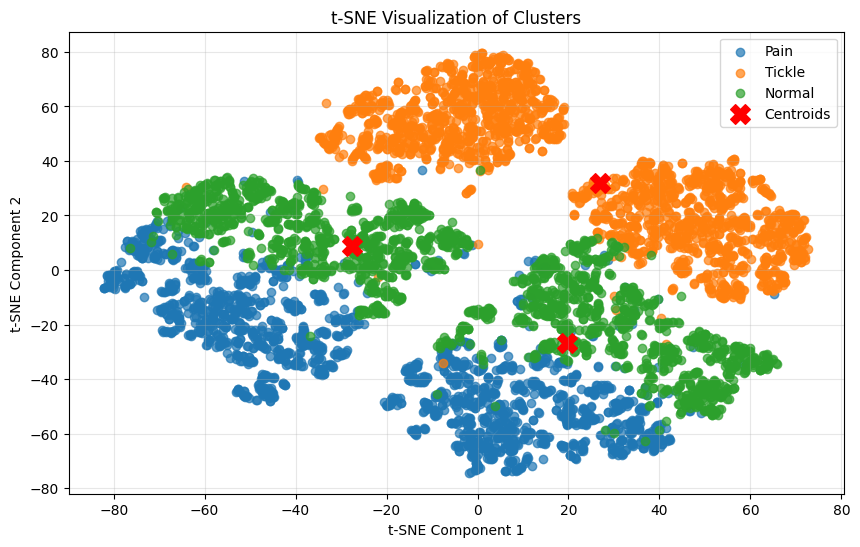

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# Load the feature data for normal individuals
data = pd.read_csv("final_train_features.csv")
data["Feature_Vector"] = data["Feature_Vector"].apply(eval)  # Convert string to list

# Extract features and labels
features = np.array(data["Feature_Vector"].tolist())
labels = data["Class"].values  # Emotion labels (pain, tickle, normal)

# Perform K-Means clustering (Step 5)
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features)

# Dimensionality reduction (t-SNE or PCA)
# Use t-SNE for 2D visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Default perplexity for main data
features_2d = tsne.fit_transform(features)

# Plot t-SNE results
plt.figure(figsize=(10, 6))
for i, emotion in enumerate(["Pain", "Tickle", "Normal"]):
    idx = np.where(labels == i)
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], label=emotion, alpha=0.7)

# Add cluster centroids (reduce perplexity for few samples)
centroids_2d = TSNE(n_components=2, perplexity=2, random_state=42).fit_transform(kmeans.cluster_centers_)
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=200, c="red", marker="X", label="Centroids")

plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()



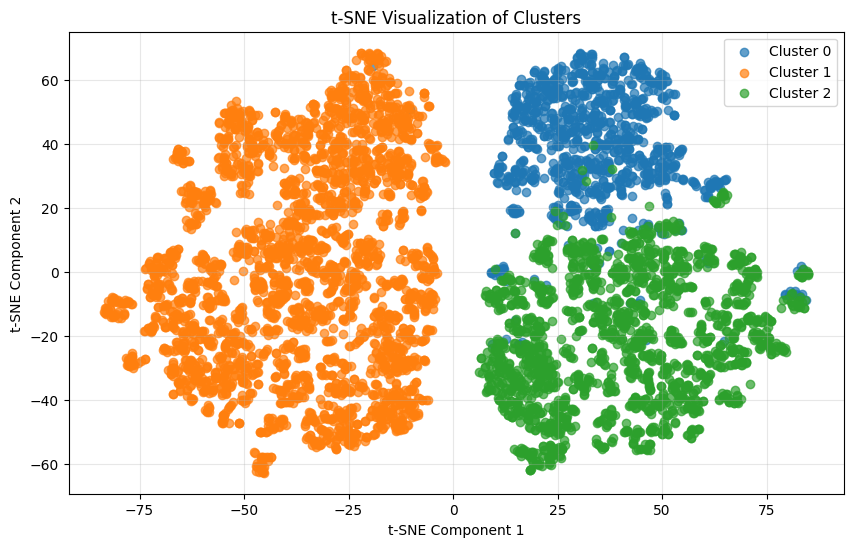

In [20]:
# simplified clustering analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Load training features
train_data = pd.read_csv(r"C:\Users\avs20\Documents\GitHub\FacialExpressionAI_Tanaka2023\Squeezenet_FullImage\3Emotions\final_train_features.csv")
train_data["Feature_Vector"] = train_data["Feature_Vector"].apply(eval)  # Convert string to list
features = np.array(train_data["Feature_Vector"].tolist())
labels = train_data["Class"].values  # Actual labels

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)  # Predicted cluster labels

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_2d = tsne.fit_transform(features_scaled)

# Plot t-SNE results with clustering
plt.figure(figsize=(10, 6))

# Visualize predicted clusters
for cluster_id in range(n_clusters):
    idx = np.where(cluster_labels == cluster_id)
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], label=f"Cluster {cluster_id}", alpha=0.7)

plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# Load training features
train_data = pd.read_csv(r"C:\Users\avs20\Documents\GitHub\FacialExpressionAI_Tanaka2023\Squeezenet_FullImage\3Emotions\final_train_features.csv")
train_data["Feature_Vector"] = train_data["Feature_Vector"].apply(eval)  # Convert string to list
features = np.array(train_data["Feature_Vector"].tolist())
labels = train_data["Class"].values  # Actual labels (e.g., 0, 1, 2 for pain, tickle, normal)

# Map numeric labels to emotion names
label_map = {0: "Pain", 1: "Tickle", 2: "Normal"}
emotions = [label_map[label] for label in labels]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform K-Means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(features_scaled)  # Predicted cluster labels

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_2d = tsne.fit_transform(features_scaled)

# Plot t-SNE results with clustering and actual labels
plt.figure(figsize=(12, 8))

# Plot each data point with actual labels (emotions)
for emotion in label_map.values():
    idx = np.where(np.array(emotions) == emotion)
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], label=f"Actual: {emotion}", alpha=0.6)

# Overlay cluster assignments
for cluster_id in range(n_clusters):
    idx = np.where(cluster_labels == cluster_id)
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], label=f"Cluster {cluster_id}", edgecolor="black", alpha=0.3, s=100, linewidth=0.5)

# Add labels and legend
plt.title("t-SNE Visualization: Clustering with Actual Labels")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.show()



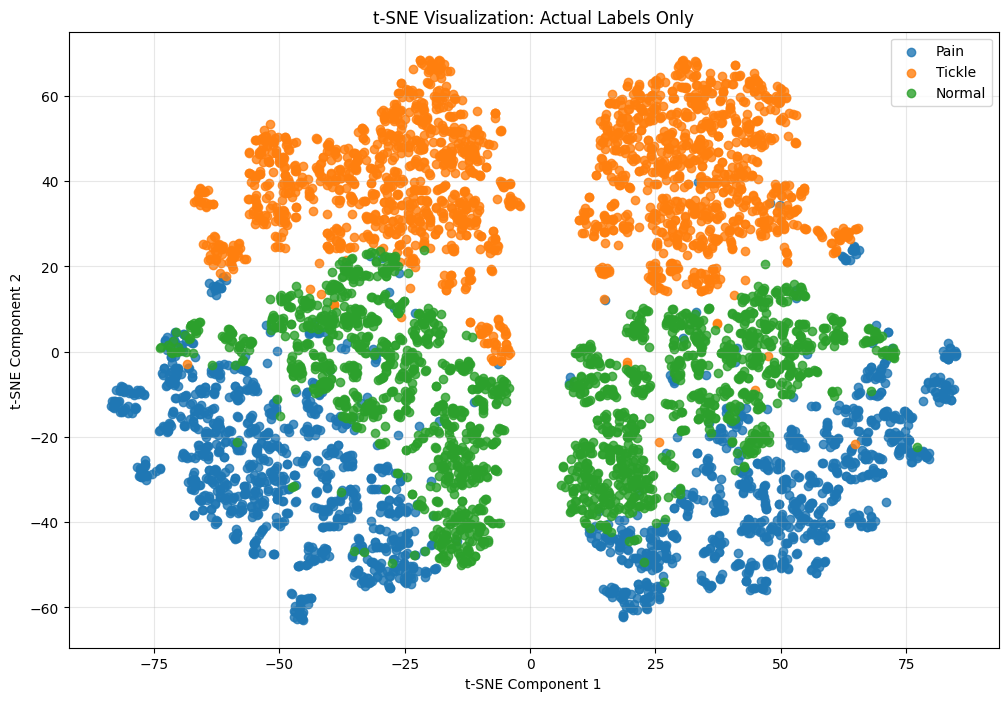

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load training features
train_data = pd.read_csv(r"C:\Users\avs20\Documents\GitHub\FacialExpressionAI_Tanaka2023\Squeezenet_FullImage\3Emotions\final_train_features.csv")
train_data["Feature_Vector"] = train_data["Feature_Vector"].apply(eval)  # Convert string to list
features = np.array(train_data["Feature_Vector"].tolist())
labels = train_data["Class"].values  # Actual labels (e.g., 0, 1, 2 for pain, tickle, normal)

# Map numeric labels to emotion names
label_map = {0: "Pain", 1: "Tickle", 2: "Normal"}
emotions = [label_map[label] for label in labels]

# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
features_2d = tsne.fit_transform(features_scaled)

# Plot t-SNE results with only actual labels
plt.figure(figsize=(12, 8))

# Plot each data point with color-coded actual labels
for emotion in label_map.values():
    idx = np.where(np.array(emotions) == emotion)
    plt.scatter(features_2d[idx, 0], features_2d[idx, 1], label=f"{emotion}", alpha=0.8)

# Add labels and legend
plt.title("t-SNE Visualization: Actual Labels Only")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(loc="best")
plt.grid(alpha=0.3)
plt.show()



In [ ]:
# heatmap generation